In [1]:
# Módulo 3 - Aula 1: Introdução à Modelagem Computacional
# Tema: Projeções de Crescimento Populacional

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Configuração visual
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("🔬 +CiênciaSJC - Módulo 3: Modelagem Computacional e Simulação")
print("=" * 60)
print("Aula 1: Conceitos de Modelagem e Crescimento Populacional")
print("=" * 60)

🔬 +CiênciaSJC - Módulo 3: Modelagem Computacional e Simulação
Aula 1: Conceitos de Modelagem e Crescimento Populacional


## 📚 O que é Modelagem Computacional?

A modelagem computacional é uma ferramenta poderosa que nos permite:
- **Simular** fenômenos da vida real usando matemática e programação
- **Prever** comportamentos futuros baseados em dados históricos
- **Testar** diferentes cenários sem precisar esperar anos pelos resultados
- **Entender** padrões complexos de forma visual e intuitiva

### Exemplos no nosso dia a dia:
- Previsão do tempo
- Simulação de epidemias (como COVID-19)
- Previsão de crescimento populacional
- Simulação de investimentos

## 🌍 Projeto Prático: Crescimento Populacional de São José dos Campos

Vamos criar um modelo para simular o crescimento populacional da nossa cidade!

In [2]:
# Dados históricos de São José dos Campos (exemplo)
anos_historicos = [2010, 2015, 2020, 2022]
populacao_historica = [629921, 688597, 729737, 751579]

# Criando DataFrame com dados históricos
dados_historicos = pd.DataFrame({
    'ano': anos_historicos,
    'populacao': populacao_historica
})

print("📊 Dados Históricos de São José dos Campos:")
print(dados_historicos)
print()

# Calculando taxa de crescimento média
dados_historicos['crescimento_anual'] = dados_historicos['populacao'].pct_change() * 100
taxa_media = dados_historicos['crescimento_anual'].mean()

print(f"📈 Taxa de crescimento média anual: {taxa_media:.2f}%")

📊 Dados Históricos de São José dos Campos:
    ano  populacao
0  2010     629921
1  2015     688597
2  2020     729737
3  2022     751579

📈 Taxa de crescimento média anual: 6.09%


## 🔢 Modelo 1: Crescimento Linear Simples

Vamos começar com o modelo mais básico: crescimento linear constante.

In [3]:
def modelo_crescimento_linear(populacao_inicial, taxa_crescimento, anos):
    """
    Modelo de crescimento linear simples
    
    Parâmetros:
    - populacao_inicial: população no ano base
    - taxa_crescimento: taxa de crescimento anual (%)
    - anos: número de anos para projetar
    """
    populacao_atual = populacao_inicial
    resultados = []
    
    for ano in range(anos + 1):
        ano_atual = 2022 + ano
        resultados.append({
            'ano': ano_atual,
            'populacao': int(populacao_atual),
            'crescimento_abs': int(populacao_atual * (taxa_crescimento/100)) if ano > 0 else 0
        })
        
        # Aplicar crescimento para próximo ano
        if ano < anos:
            populacao_atual += populacao_atual * (taxa_crescimento/100)
    
    return pd.DataFrame(resultados)

# Simulando crescimento para os próximos 10 anos
projecao_linear = modelo_crescimento_linear(751579, 1.5, 10)

print("🔮 Projeção Linear - Próximos 10 anos:")
print(projecao_linear.head(6))

🔮 Projeção Linear - Próximos 10 anos:
    ano  populacao  crescimento_abs
0  2022     751579                0
1  2023     762852            11442
2  2024     774295            11614
3  2025     785909            11788
4  2026     797698            11965
5  2027     809664            12144


## 📈 Modelo 2: Crescimento Exponencial

O crescimento populacional real é mais complexo - vamos usar um modelo exponencial!

In [4]:
def modelo_crescimento_exponencial(populacao_inicial, taxa_crescimento, anos, fator_desaceleracao=0.98):
    """
    Modelo de crescimento exponencial com desaceleração
    
    Parâmetros:
    - populacao_inicial: população no ano base
    - taxa_crescimento: taxa inicial de crescimento (%)
    - anos: número de anos para projetar
    - fator_desaceleracao: fator que reduz a taxa ao longo do tempo
    """
    populacao_atual = populacao_inicial
    taxa_atual = taxa_crescimento
    resultados = []
    
    for ano in range(anos + 1):
        ano_atual = 2022 + ano
        resultados.append({
            'ano': ano_atual,
            'populacao': int(populacao_atual),
            'taxa_atual': taxa_atual,
            'crescimento_abs': int(populacao_atual * (taxa_atual/100)) if ano > 0 else 0
        })
        
        # Aplicar crescimento para próximo ano
        if ano < anos:
            populacao_atual *= (1 + taxa_atual/100)
            taxa_atual *= fator_desaceleracao  # Taxa diminui com o tempo
    
    return pd.DataFrame(resultados)

# Simulando crescimento exponencial
projecao_exponencial = modelo_crescimento_exponencial(751579, 1.8, 10)

print("🚀 Projeção Exponencial - Próximos 10 anos:")
print(projecao_exponencial.head(6))

🚀 Projeção Exponencial - Próximos 10 anos:
    ano  populacao  taxa_atual  crescimento_abs
0  2022     751579    1.800000                0
1  2023     765107    1.764000            13496
2  2024     778603    1.728720            13459
3  2025     792063    1.694146            13418
4  2026     805482    1.660263            13373
5  2027     818855    1.627057            13323


## 📊 Comparando os Modelos

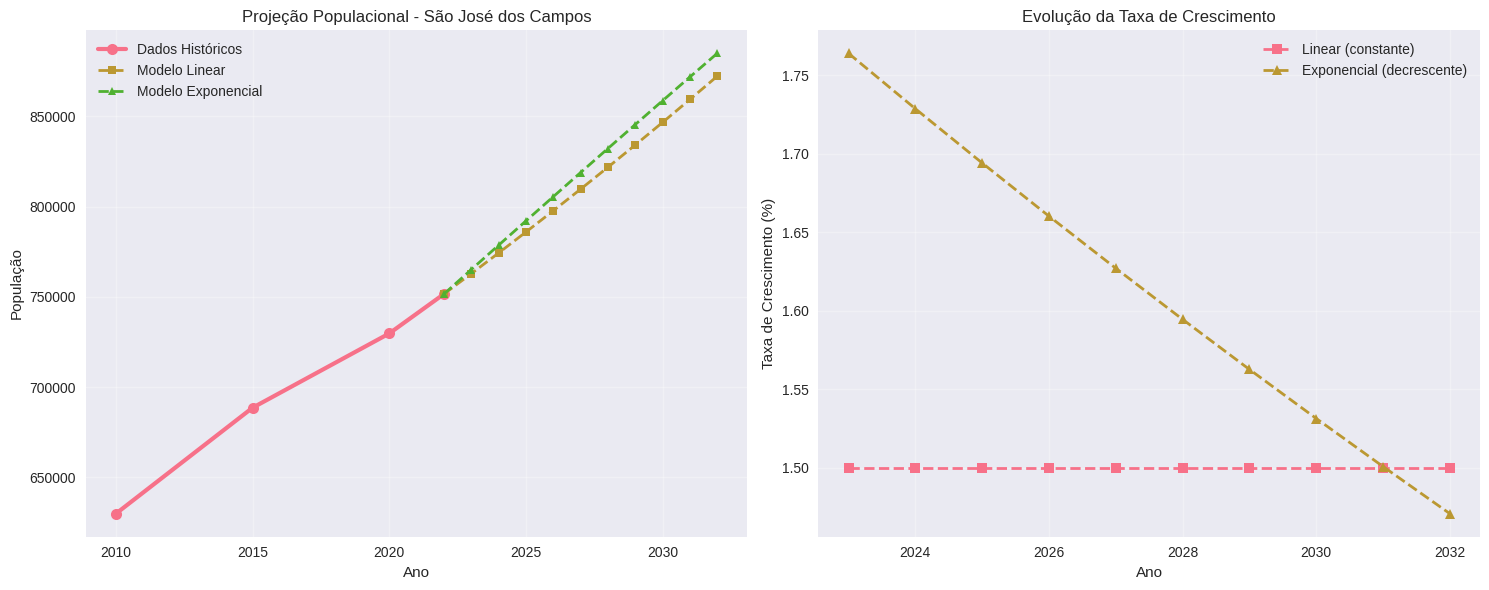

In [5]:
# Criando visualização comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Comparação de População
ax1.plot(dados_historicos['ano'], dados_historicos['populacao'], 
         'o-', label='Dados Históricos', linewidth=3, markersize=8)
ax1.plot(projecao_linear['ano'], projecao_linear['populacao'], 
         's--', label='Modelo Linear', linewidth=2, markersize=6)
ax1.plot(projecao_exponencial['ano'], projecao_exponencial['populacao'], 
         '^--', label='Modelo Exponencial', linewidth=2, markersize=6)

ax1.set_xlabel('Ano')
ax1.set_ylabel('População')
ax1.set_title('Projeção Populacional - São José dos Campos')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Gráfico 2: Taxa de Crescimento
ax2.plot(projecao_linear['ano'][1:], [1.5]*len(projecao_linear['ano'][1:]), 
         's--', label='Linear (constante)', linewidth=2)
ax2.plot(projecao_exponencial['ano'][1:], projecao_exponencial['taxa_atual'][1:], 
         '^--', label='Exponencial (decrescente)', linewidth=2)

ax2.set_xlabel('Ano')
ax2.set_ylabel('Taxa de Crescimento (%)')
ax2.set_title('Evolução da Taxa de Crescimento')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🎯 Testando Diferentes Cenários

Vamos testar como diferentes fatores afetam o crescimento populacional:

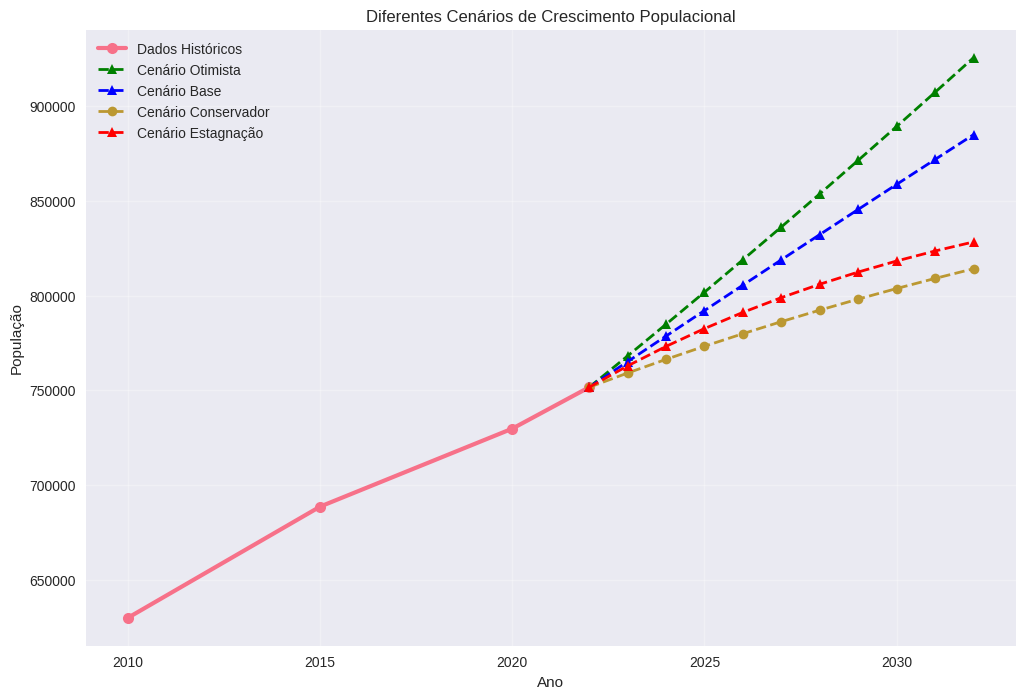

In [6]:
# Cenário 1: Crescimento otimista
cenario_otimista = modelo_crescimento_exponencial(751579, 2.2, 10, 0.99)

# Cenário 2: Crescimento conservador
cenario_conservador = modelo_crescimento_exponencial(751579, 1.0, 10, 0.95)

# Cenário 3: Crescimento com estagnação
cenario_estagnacao = modelo_crescimento_exponencial(751579, 1.5, 10, 0.90)

# Comparação de cenários
plt.figure(figsize=(12, 8))

plt.plot(dados_historicos['ano'], dados_historicos['populacao'], 
         'o-', label='Dados Históricos', linewidth=3, markersize=8)
plt.plot(cenario_otimista['ano'], cenario_otimista['populacao'], 
         'g^--', label='Cenário Otimista', linewidth=2)
plt.plot(projecao_exponencial['ano'], projecao_exponencial['populacao'], 
         'b^--', label='Cenário Base', linewidth=2)
plt.plot(cenario_conservador['ano'], cenario_conservador['populacao'], 
         'o--', label='Cenário Conservador', linewidth=2)
plt.plot(cenario_estagnacao['ano'], cenario_estagnacao['populacao'], 
         'r^--', label='Cenário Estagnação', linewidth=2)

plt.xlabel('Ano')
plt.ylabel('População')
plt.title('Diferentes Cenários de Crescimento Populacional')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 🔍 Análise dos Resultados

Vamos comparar os diferentes cenários:

In [7]:
# Criando tabela comparativa para 2032
comparacao_2032 = pd.DataFrame({
    'Cenário': ['Otimista', 'Base', 'Conservador', 'Estagnação'],
    'População_2032': [
        cenario_otimista[cenario_otimista['ano'] == 2032]['populacao'].iloc[0],
        projecao_exponencial[projecao_exponencial['ano'] == 2032]['populacao'].iloc[0],
        cenario_conservador[cenario_conservador['ano'] == 2032]['populacao'].iloc[0],
        cenario_estagnacao[cenario_estagnacao['ano'] == 2032]['populacao'].iloc[0]
    ]
})

# Calculando diferenças
comparacao_2032['Diferença_Base'] = comparacao_2032['População_2032'] - comparacao_2032['População_2032'].iloc[1]
comparacao_2032['Crescimento_Total'] = ((comparacao_2032['População_2032'] - 751579) / 751579) * 100

print("📋 Comparação dos Cenários para 2032:")
print(comparacao_2032)

📋 Comparação dos Cenários para 2032:
       Cenário  População_2032  Diferença_Base  Crescimento_Total
0     Otimista          925516           40624          23.142877
1         Base          884892               0          17.737723
2  Conservador          814115          -70777           8.320616
3   Estagnação          828285          -56607          10.205980


## 💡 Exercícios Práticos

### Exercício 1: Modifique os parâmetros
Teste diferentes valores para:
- Taxa de crescimento inicial
- Fator de desaceleração
- Número de anos de projeção

### Exercício 2: Adicione novos fatores
Pense em fatores que poderiam afetar o crescimento populacional:
- Migração
- Políticas públicas
- Desenvolvimento econômico
- Eventos externos (pandemias, crises)

### Exercício 3: Validação do modelo
Compare suas projeções com dados reais quando disponíveis

In [8]:
# Exemplo de exercício: Simulação com migração
def modelo_com_migracao(populacao_inicial, taxa_crescimento, anos, migracao_anual=0):
    """
    Modelo que inclui migração
    
    Parâmetros:
    - migracao_anual: número de pessoas que migram por ano (+ entrada, - saída)
    """
    populacao_atual = populacao_inicial
    resultados = []
    
    for ano in range(anos + 1):
        ano_atual = 2022 + ano
        resultados.append({
            'ano': ano_atual,
            'populacao': int(populacao_atual),
            'migracao': migracao_anual if ano > 0 else 0
        })
        
        if ano < anos:
            # Crescimento natural + migração
            populacao_atual = populacao_atual * (1 + taxa_crescimento/100) + migracao_anual
    
    return pd.DataFrame(resultados)

# Teste com migração positiva (chegada de pessoas)
projecao_migracao = modelo_com_migracao(751579, 1.5, 10, 5000)

print("🔄 Modelo com Migração (5000 pessoas/ano):")
print(projecao_migracao.head(6))

🔄 Modelo com Migração (5000 pessoas/ano):
    ano  populacao  migracao
0  2022     751579         0
1  2023     767852      5000
2  2024     784370      5000
3  2025     801136      5000
4  2026     818153      5000
5  2027     835425      5000


## 🎓 Resumo da Aula

### O que aprendemos:
1. **Conceitos básicos** de modelagem computacional
2. **Diferenças** entre modelos lineares e exponenciais
3. **Importância** de testar diferentes cenários
4. **Limitações** dos modelos e necessidade de validação

### Próxima aula:
- Simulação de consumo energético
- Introdução à probabilidade em simulações
- Modelos estocásticos (com aleatoriedade)

### Para casa:
Pesquise dados populacionais da sua cidade e teste os modelos!

In [9]:
print("\n🎉 Parabéns! Você completou a primeira aula de Modelagem Computacional!")
print("Na próxima aula, vamos trabalhar com simulação de consumo energético.")


🎉 Parabéns! Você completou a primeira aula de Modelagem Computacional!
Na próxima aula, vamos trabalhar com simulação de consumo energético.
